In [58]:
import os
from glob import glob
import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
base_path = 'E:/Child Skin Disease(part)/Total_Dataset'
# base_path = os.path.join(base_path, )

In [6]:
train_list = [0, 1, 2, 3, 4, 5, 6, 9]
test_list = [7, 8]

In [65]:
total_list = []
train_classes_list = {}
test_classes_list = {}
# head_cl

In [66]:
# images, labels = 
for i in train_list:
    for cls in os.listdir(os.path.join(base_path, f'H{i}')):
        if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
            
            if cls not in total_list:
                total_list.append(cls)

            if cls in train_classes_list:
                train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            else:
                train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            

In [67]:
for i in test_list:
    for cls in os.listdir(os.path.join(base_path, f'H{i}')):
        if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
            
            if cls not in total_list:
                total_list.append(cls)

            if cls in test_classes_list:
                test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            else:
                test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))

In [71]:
total_df = pd.DataFrame(columns=['Disease', 'Train Count', 'Test Count']) 

for i, t in enumerate(total_list):
    total_df.loc[i, 'Disease'] = t 
    total_df.loc[i, 'Train Count'] = train_classes_list[t]
    total_df.loc[i, 'Test Count'] = test_classes_list[t]
    
    
total_df

,Disease,Train Count,Test Count
0,Abscess,78,200
1,Acanthosis nigricans,198,549
2,Acne,1822,420
3,Acne neonatorum,120,152
4,Acne scar integrated,382,0
...,...,...,...
138,Urticaria pigmentosa,360,23
139,Vascular malformation,84,30
140,Verruca plana,1374,254
141,Viral exanthem,351,760


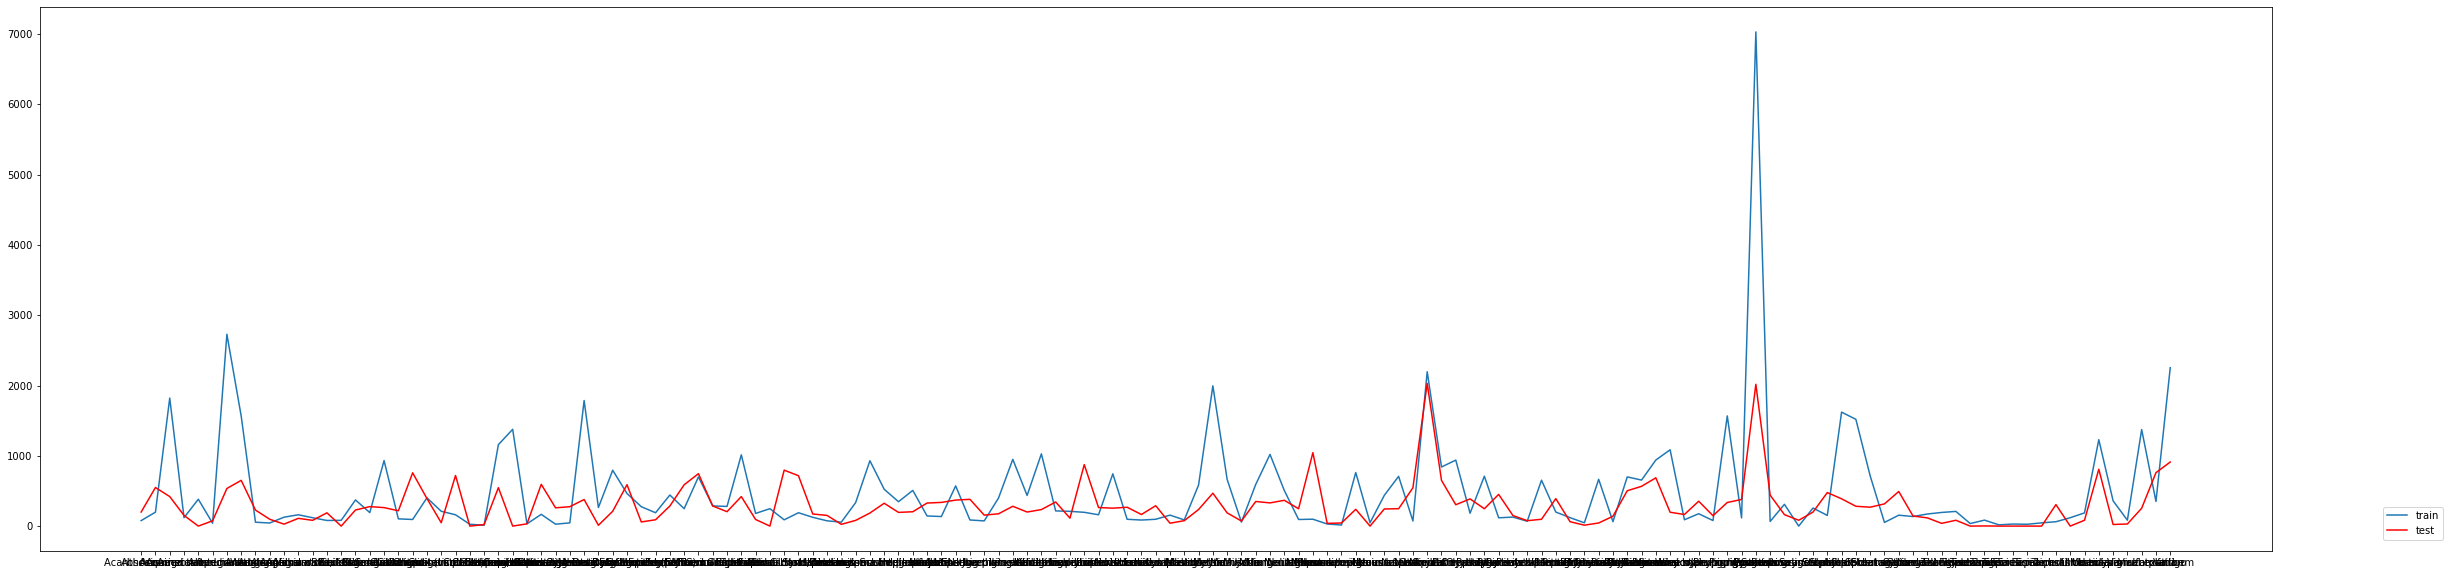

In [54]:
plt.figure(figsize=(40, 10))
plt.plot(total_list, [train_classes_list[i] for i in total_list], label='train')
plt.plot(total_list, [test_classes_list[i] for i in total_list], 'r', label='test')
plt.legend(loc=(1.05, 0.02))
plt.show() 

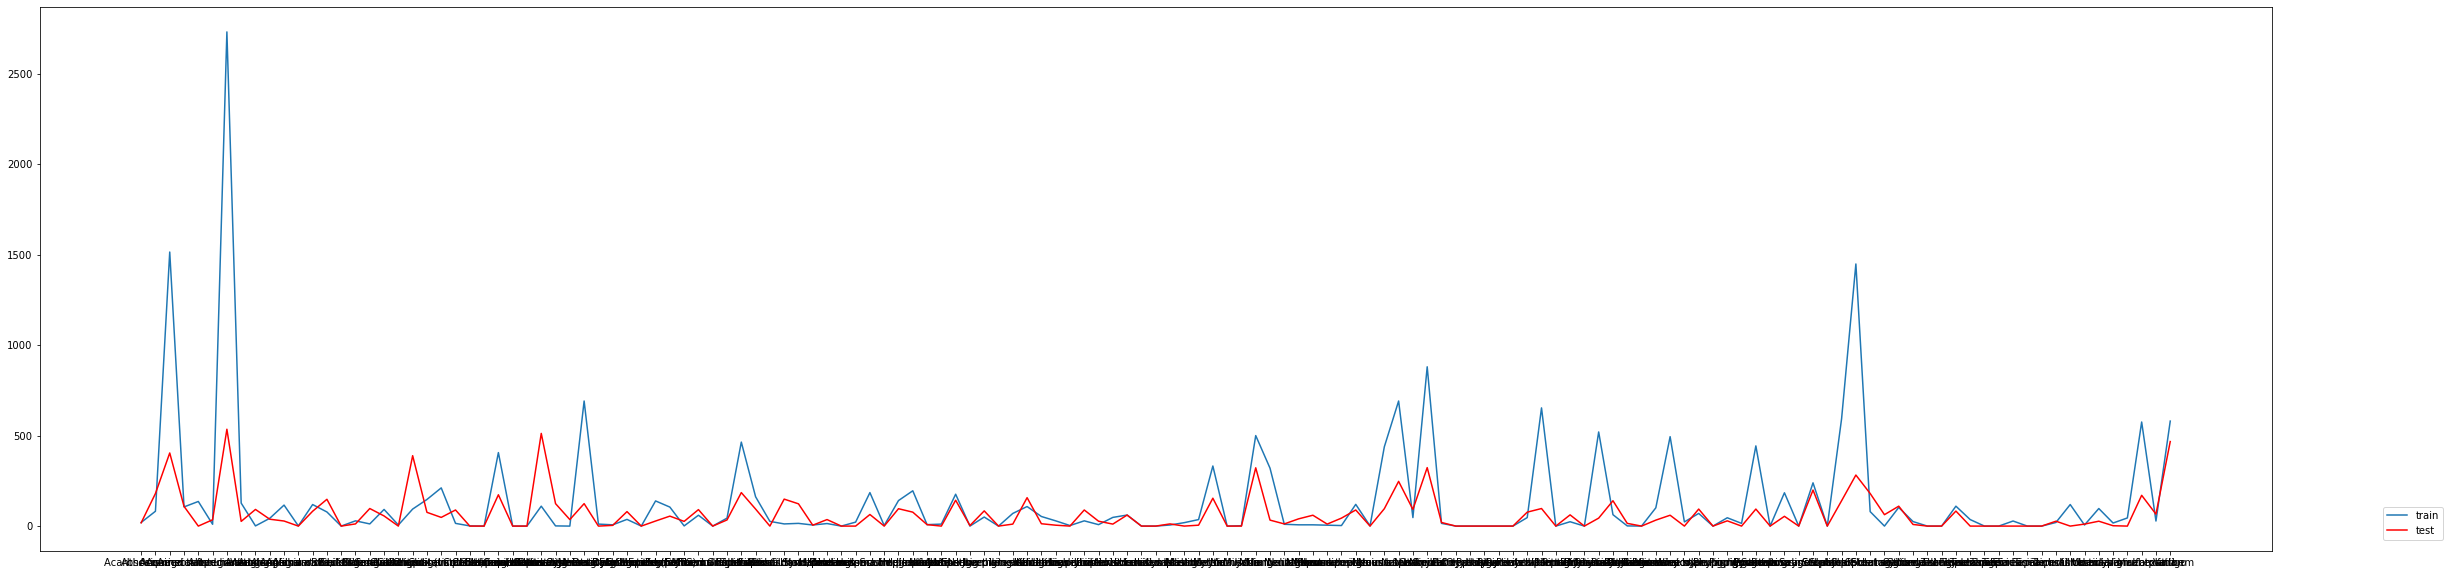

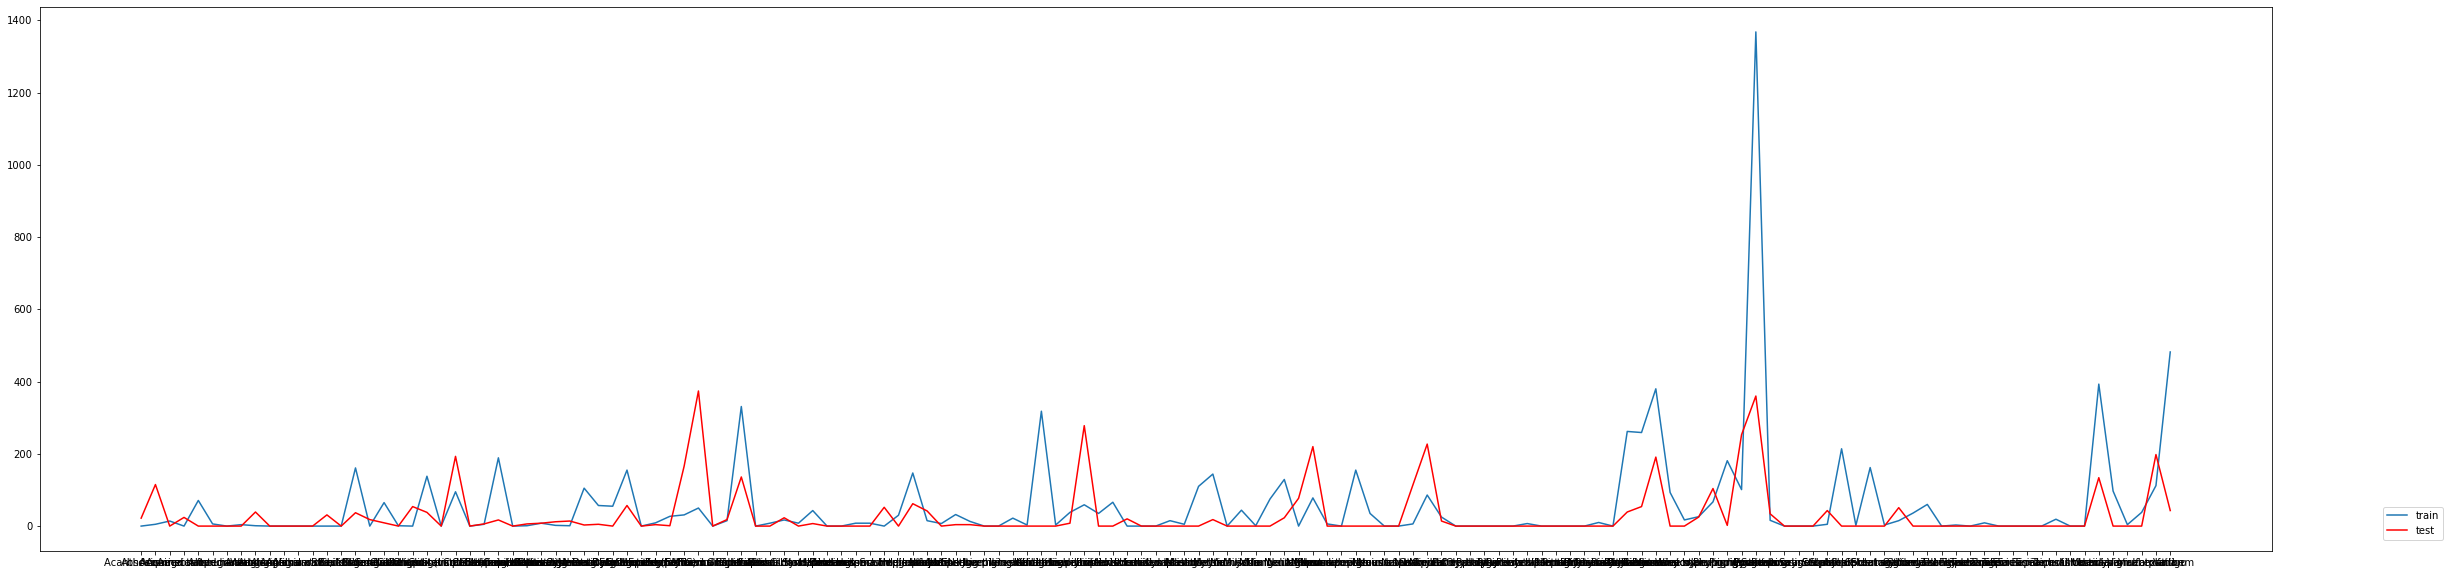

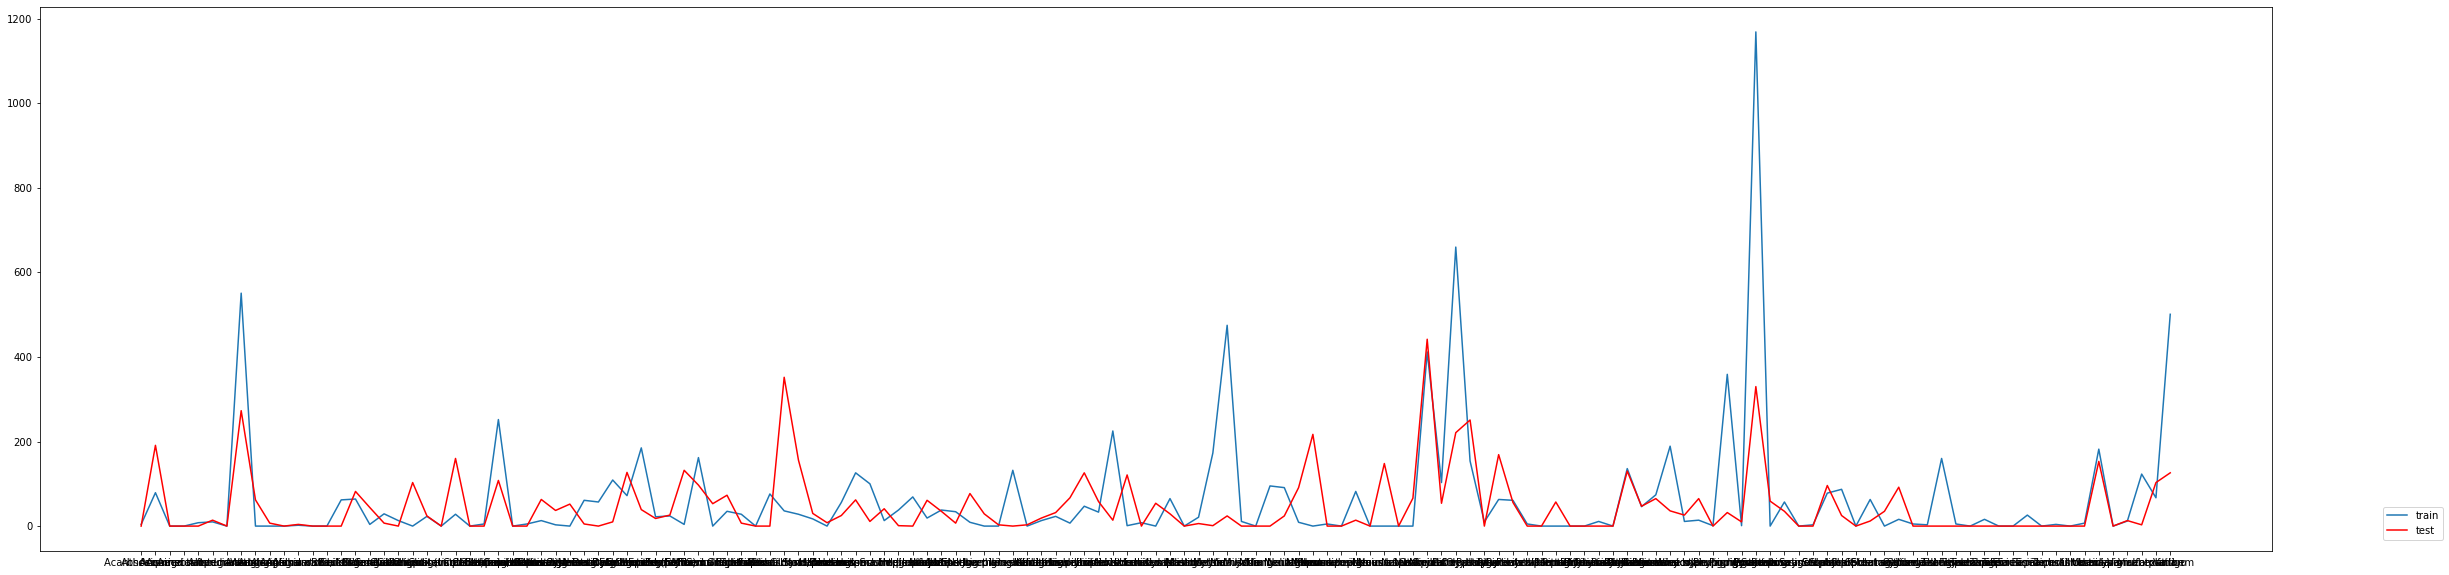

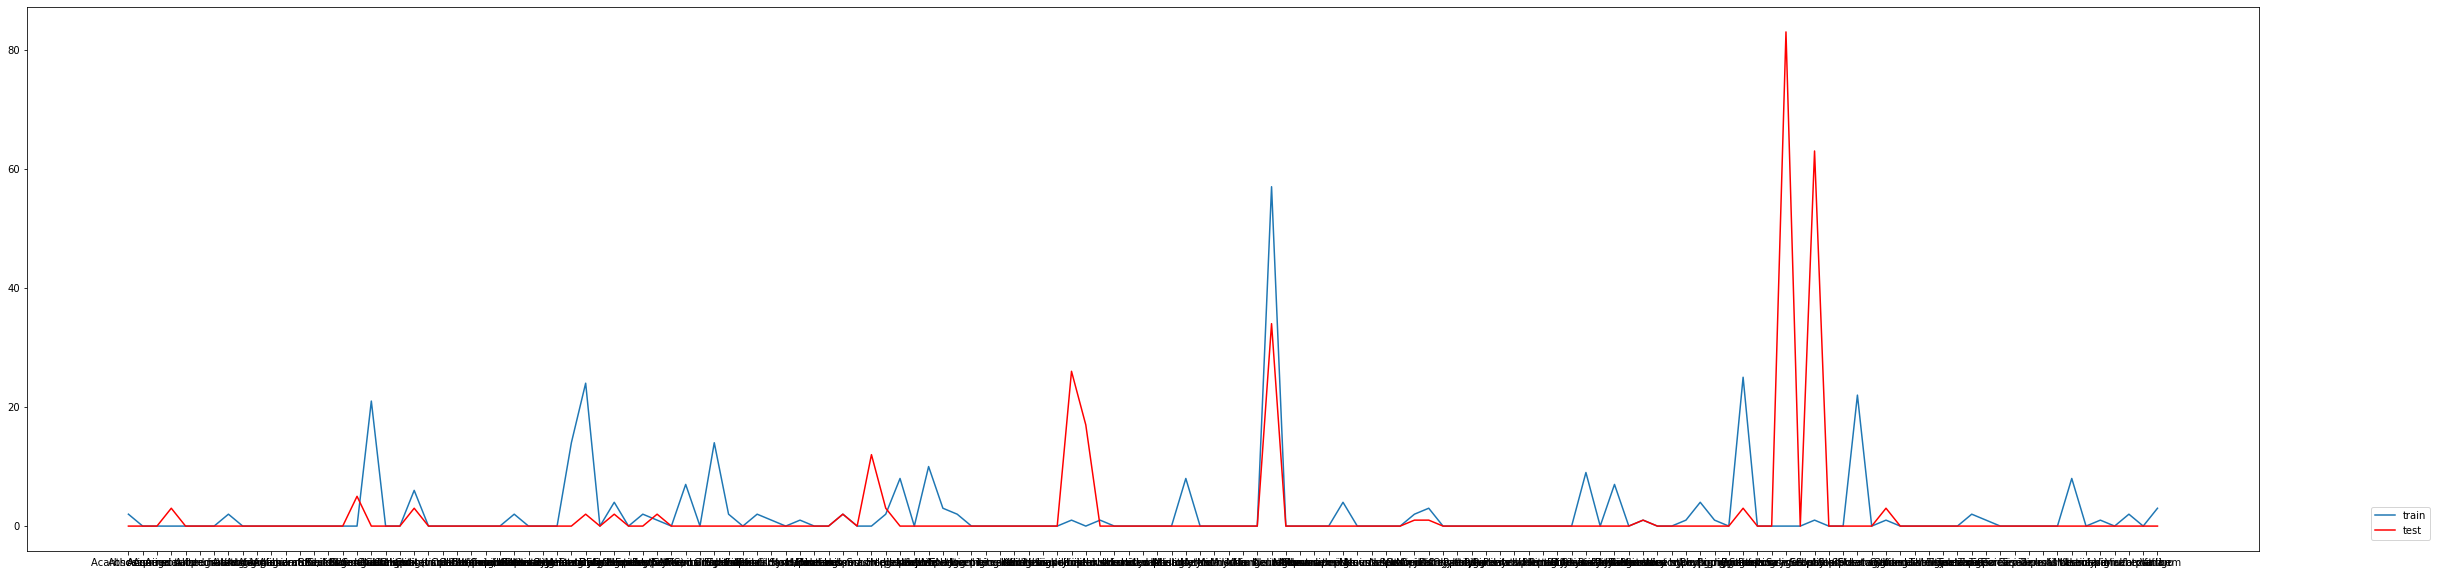

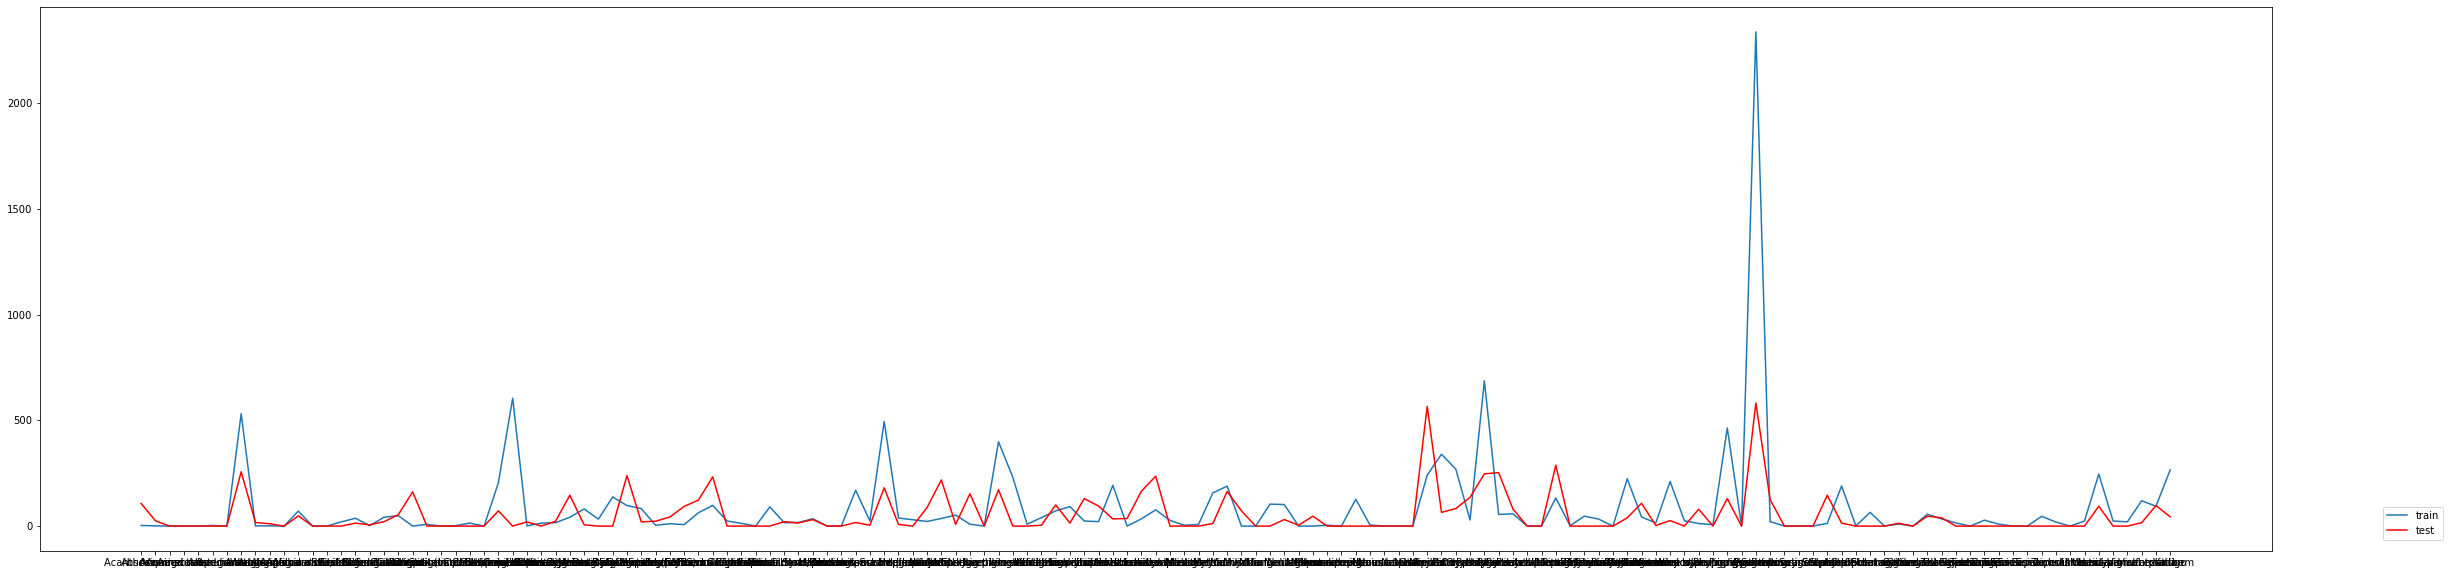

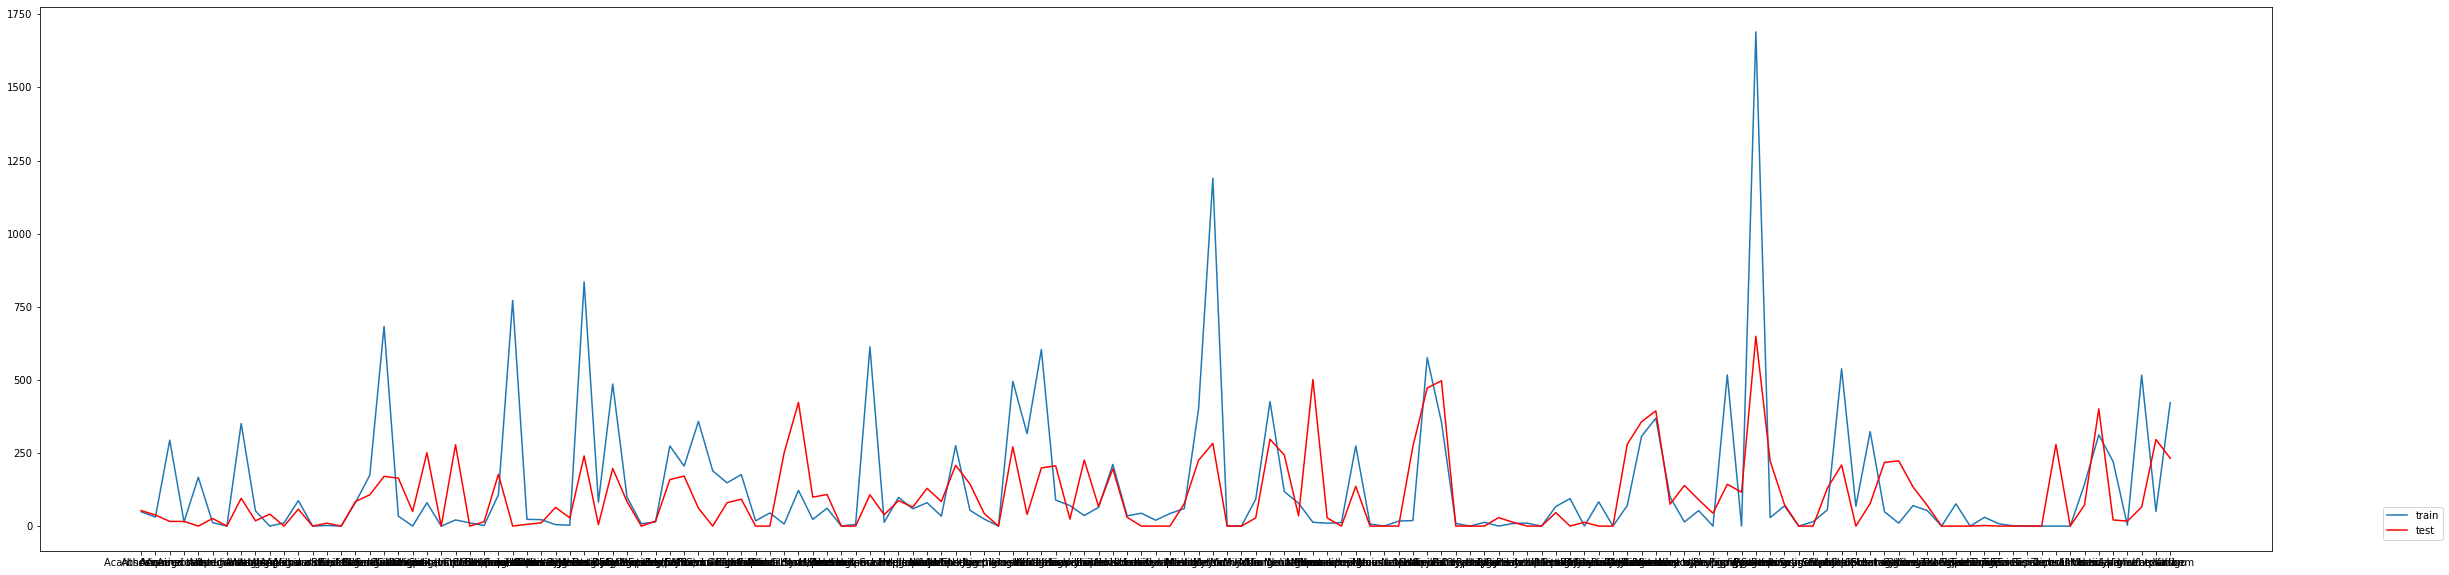

In [57]:
# 'head' : 0, 
# 'body' : 1, 
# 'upper' : 2, 
# 'ass' : 3, 
# 'bottom' : 4,
# 'etc' : 5
parts = ['head', 'body', 'upper', 'ass', 'bottom', 'etc']

for part in parts: 
    
    total_list = []
    train_classes_list = {}
    test_classes_list = {}
    
    for i in train_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in train_classes_list:
                    train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                    
                    
    for i in test_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in test_classes_list:
                    test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                    
                    
    plt.figure(figsize=(40, 10))
    plt.plot(total_list, [train_classes_list[i] for i in total_list], label='train')
    plt.plot(total_list, [test_classes_list[i] for i in total_list], 'r', label='test')
    plt.legend(loc=(1.05, 0.02))
    plt.show() 
